In [286]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import shape
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [250]:
dataset=pd.read_csv("C:/SCHOOL/2024/GIS/Crop Prediction/India dataset/indiancrop_dataset.csv")
dataset

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [179]:
dataset.head()
dataset.isnull().sum()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


## Data Correlation

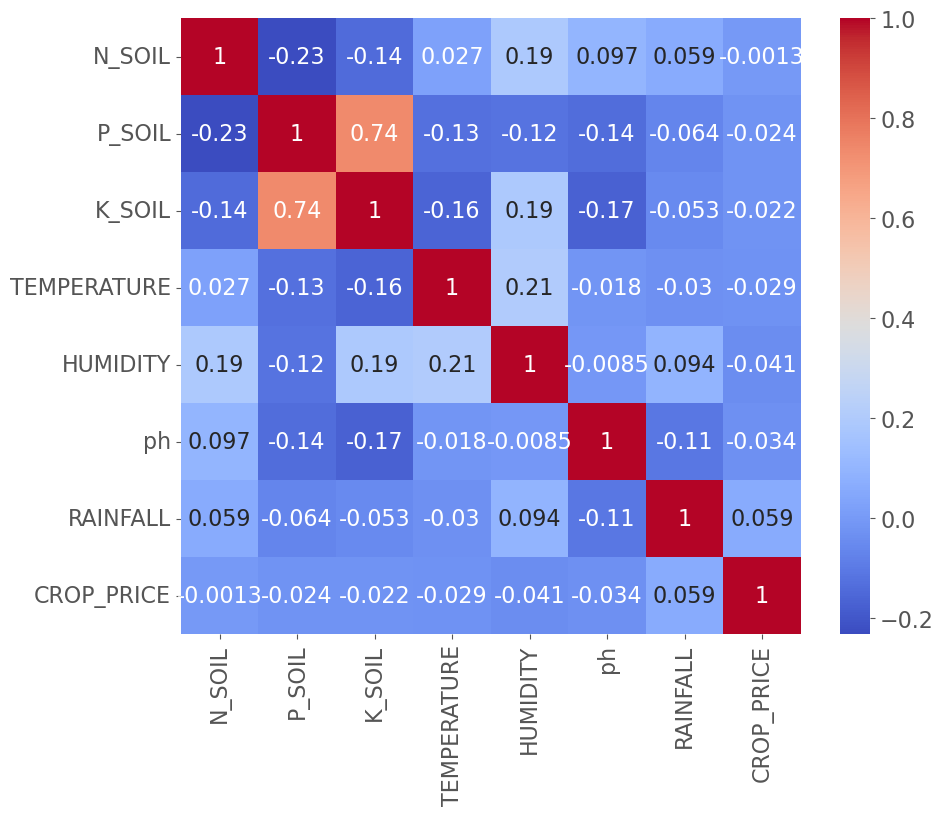

In [192]:
#use numeric data to analyse the correlation of the features
n=dataset.select_dtypes(include='number')
corr_matrix=n.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,ax=ax)
plt.show()

In [251]:
#determine cropyiled based on influence oh the features 
dataset['CROP_YIELD'] = (0.3 * dataset['N_SOIL'] + 0.2 * dataset['P_SOIL'] + 0.1 * dataset['K_SOIL'] + 0.2 * dataset['TEMPERATURE'] + .2 * dataset['RAINFALL'])
dataset['CROP_YIELD']

dataset=dataset.drop(['STATE','CROP'],axis=1)
dataset

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,CROP_YIELD
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice,84.463056
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice,90.885200
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice,90.793741
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice,87.071026
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice,92.569503
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee,83.009829
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee,66.468344
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee,84.490927
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee,75.589542


# Model creation and testing

Mean Squared Error: 2.7828025872309414
R-squared(Accuracy): 0.9906100980644663


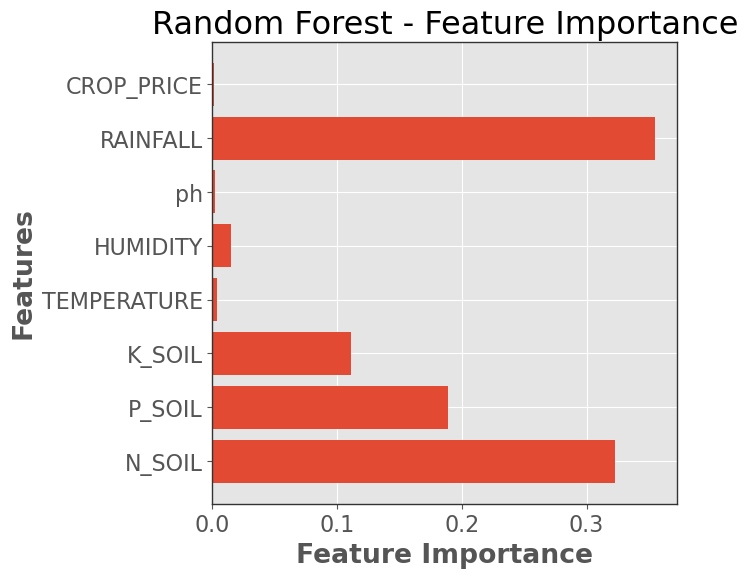

In [219]:

# Separate features and target variable
X = dataset.drop('CROP_YIELD', axis=1)
y = dataset['CROP_YIELD']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluatign the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#model metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared(Accuracy): {r2}')

# Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.show()

# Spatial analysis

In [294]:
dataset1=pd.read_csv("C:/SCHOOL/2024/GIS/Crop Prediction/India dataset/indiancrop_dataset.csv")
dataset1
# dataset1['STATE'].unique()
# len(dataset1['STATE'].unique())


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


## India states Geodataframe

In [295]:
states=gpd.read_file('C:/SCHOOL/2024/GIS/Crop Prediction/india states/India_State_Shapefile')
states

,Name,Type,geometry
0,West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
2,Chandigarh,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343..."
3,Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20..."
4,Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."
5,Haryana,State,"POLYGON ((76.57526 30.10063, 76.57645 30.10152..."
6,Jharkhand,State,"POLYGON ((87.69613 24.16027, 87.69625 24.15974..."
7,Karnataka,State,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18..."
8,Kerala,State,"POLYGON ((74.98896 12.79553, 74.98953 12.79554..."
9,Lakshadweep,Union Territory,"MULTIPOLYGON (((73.08025 8.32651, 73.08029 8.3..."


Text(0.5, 1.0, 'Indian States')

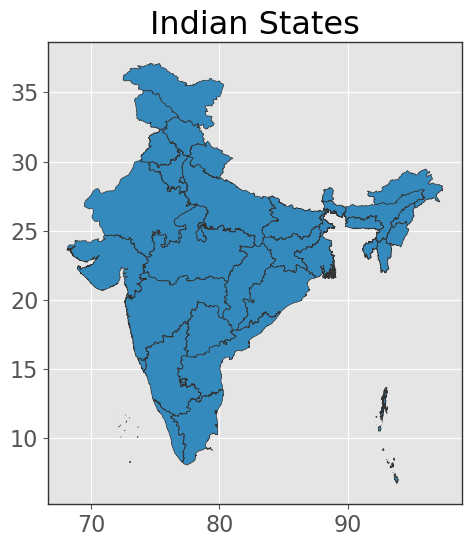

In [237]:
states.plot(edgecolor='.2')
plt.title('Indian States')

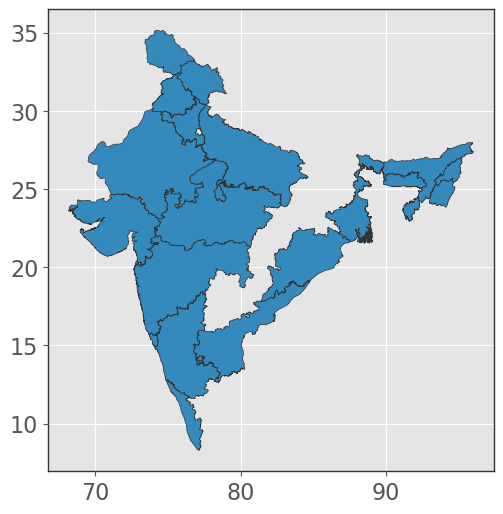

In [296]:
filtered_states = states[states['Name'].isin(dataset1['STATE'])]
filtered_states
filtered_states.plot(edgecolor='.2')
plt.show()

## merging geodataframe + dataframe 

In [300]:
#merging the dataframe with geodataframe
# Join the two tables based on the 'STATE' and 'Name' columns
merged_df = pd.merge(dataset, filtered_states, left_on='STATE', right_on='Name', how='inner')

merged_df['geometry'] = merged_df['geometry'].apply(shape)

# Create a GeoDataFrame from the merged DataFrame
merged_geodf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Drop the duplicate 'Name' column, if needed
merged_geodf = merged_geodf.drop(columns='Name')

# Display the merged GeoDataFrame
merged_geodf


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,CROP_YIELD,Type,geometry
0,60,48,39,24.282094,80.300256,7.042299,231.086335,Andhra Pradesh,620,Rice,82.573686,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670..."
1,85,38,41,21.587118,82.788371,6.249051,276.655246,Andhra Pradesh,300,Rice,96.848473,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670..."
2,91,35,39,23.793920,80.418180,6.970860,206.261186,Andhra Pradesh,760,Rice,84.211021,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670..."
3,77,38,36,21.865252,80.192301,5.953933,224.555017,Andhra Pradesh,4600,Rice,83.584054,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670..."
4,88,35,40,23.579436,83.587603,5.853932,291.298662,Andhra Pradesh,1900,Rice,100.375620,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee,83.009829,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1950,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee,66.468344,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1951,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee,84.490927,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1952,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee,75.589542,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


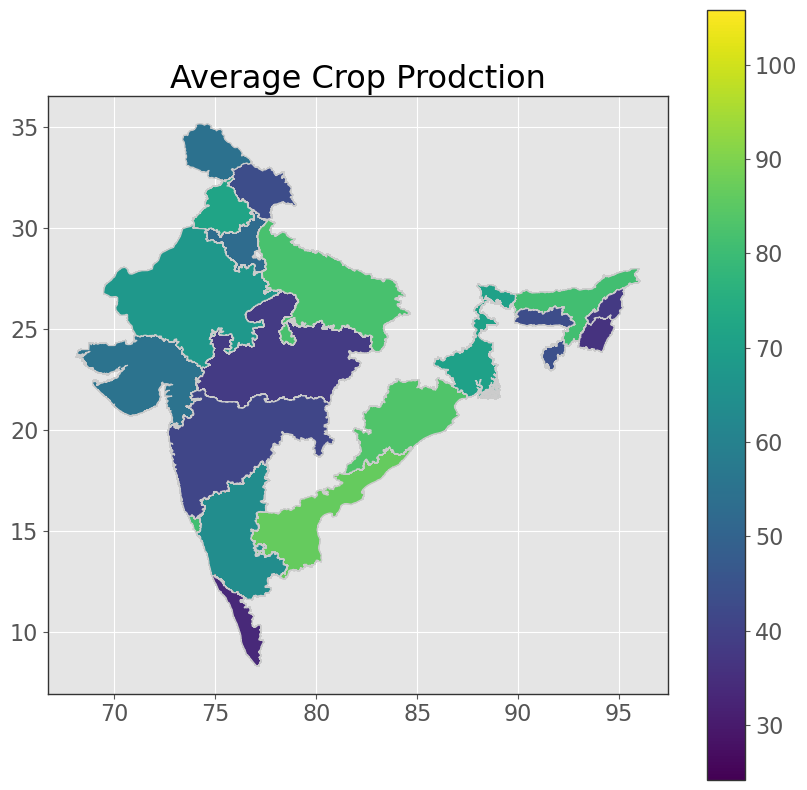

In [299]:
import geopandas as gpd

# Plot the map with different colors for each crop
fig, ax = plt.subplots(figsize=(10, 10))
merged_geodf.plot(column='CROP_YIELD', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# legend
legend = ax.get_legend()
if legend:
    legend.set_title('Crop Yield')
    crop_legend_labels = gdf['CROP'].unique()
    legend.get_texts()[0].set_text('Crop Type')
    legend.set_labels(crop_legend_labels)
plt.title('Average Crop Prodction')

plt.show()


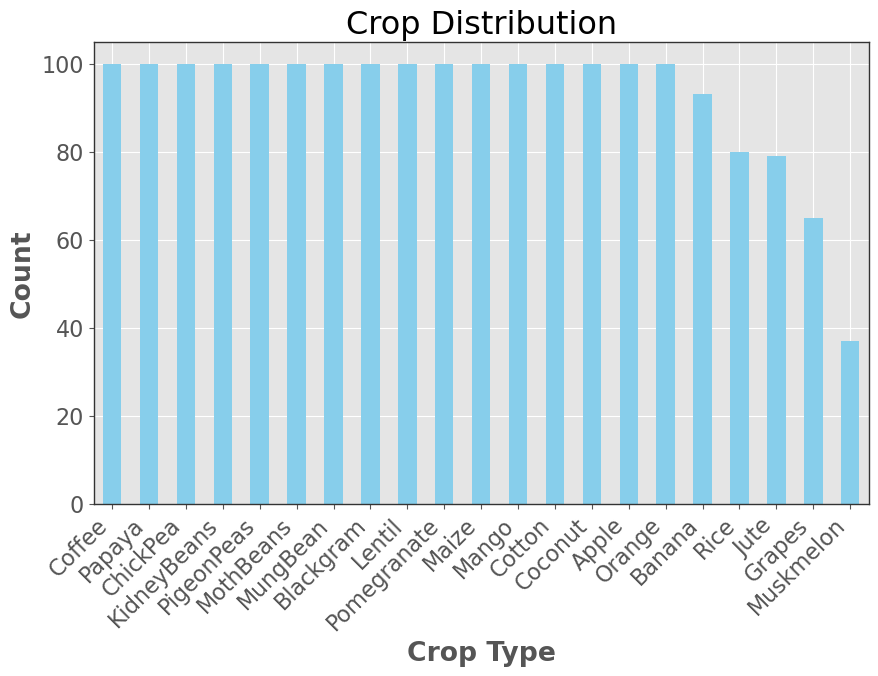

In [303]:
dataset3=merged_geodf
dataset3
# Assuming your DataFrame is named df
crop_distribution = dataset3['CROP'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
crop_distribution.plot(kind='bar', color='skyblue')
plt.title('Crop Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

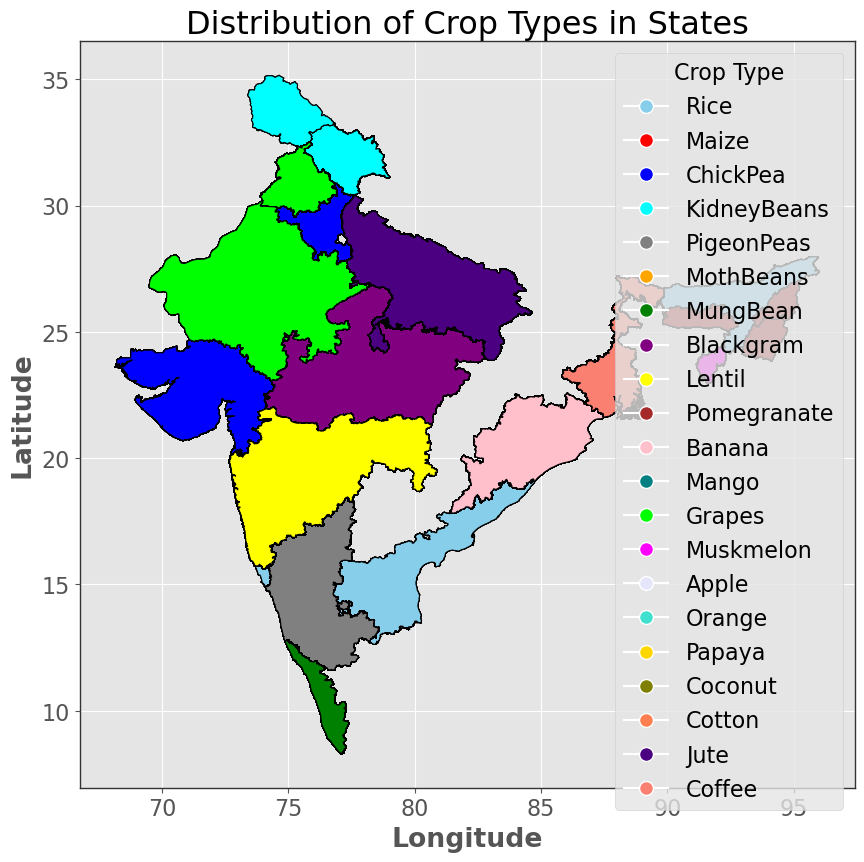

In [311]:
crop_types = dataset3['CROP'].unique()
colors = ['skyblue', 'red', 'blue', 'cyan', 'gray', 'orange', 'green', 'purple', 'yellow', 'brown',
               'pink', 'teal', 'lime', 'magenta', 'lavender', 'turquoise', 'gold', 'olive', 'coral', 'indigo', 'salmon']

fig, ax = plt.subplots(figsize=(10, 10))
for crop_type, color in zip(crop_types, colors):
    crop_data = dataset3[dataset3['CROP'] == crop_type]
    crop_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.8, label=crop_type)

ax.set_title('Distribution of Crop Types in States')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=crop_type) for crop_type, color in zip(crop_types, colors)]
ax.legend(handles=legend_elements, title='Crop Type')

# Show the plot
plt.show()

In [317]:
#area covered by each crop type
dataset3
dataset3['area']=dataset3['geometry'].area
dataset3['area']=dataset3['area']/1000
cropArea=dataset3.groupby('CROP')['area'].sum().reset_index()
print(cropArea)

           CROP      area
0         Apple  2.190574
1        Banana  0.764649
2     Blackgram  2.666288
3      ChickPea  0.463316
4       Coconut  2.190574
5        Coffee  0.753321
6        Cotton  2.190574
7        Grapes  1.385433
8          Jute  1.385613
9   KidneyBeans  0.844751
10       Lentil  2.328122
11        Maize  1.633896
12        Mango  0.474834
13    MothBeans  0.320549
14     MungBean  0.777668
15    Muskmelon  0.432865
16       Orange  2.190574
17       Papaya  2.190574
18   PigeonPeas  0.410829
19  Pomegranate  0.759243
20         Rice  0.704800


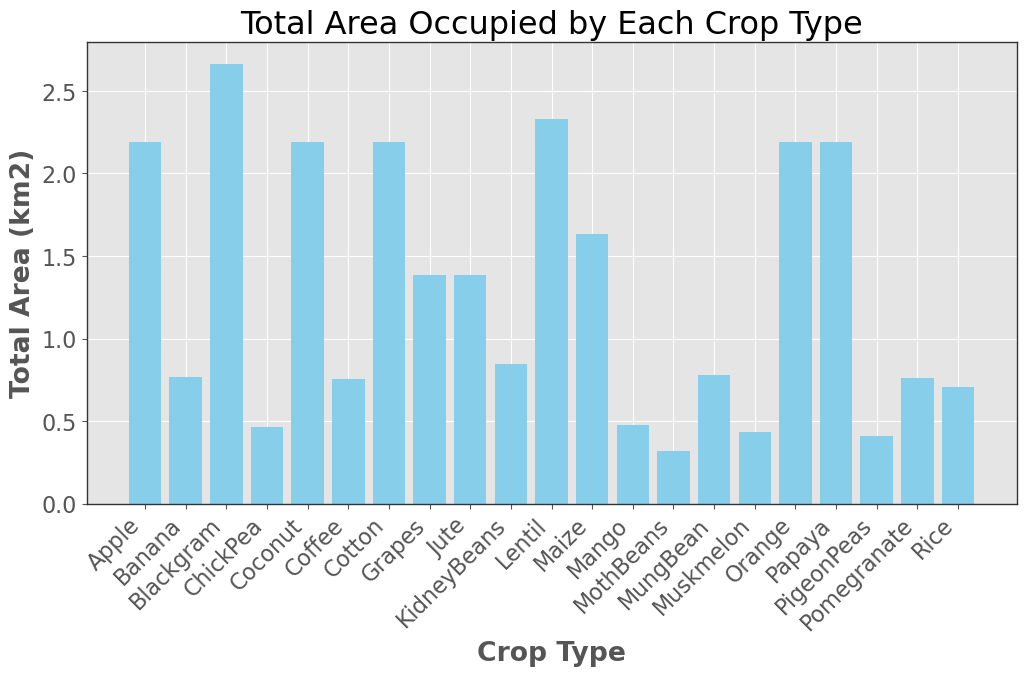

In [319]:
#visializing 
plt.figure(figsize=(12, 6))
plt.bar(cropArea['CROP'], cropArea['area'], color='skyblue')
plt.xlabel('Crop Type')
plt.ylabel('Total Area (km2)')
plt.title('Total Area Occupied by Each Crop Type')
plt.xticks(rotation=45, ha='right')
plt.show()
